In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(housing.data,housing.target,random_state = 42)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,random_state = 42)


In [7]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_valid = scalar.transform(x_valid)
x_test = scalar.transform(x_test)

In [8]:
x_train.shape


(11610, 8)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = [8]),
    keras.layers.Dense(30,activation = 'relu'),
    keras.layers.Dense(1)
])

In [10]:
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.SGD(lr=1e-3),
             metrics =['mae'])

In [15]:
model_his = model.fit(x_train,y_train,epochs = 20,validation_data = (x_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 185us/sample - loss: 0.3971 - mae: 0.4545 - val_loss: 0.4142 - val_mae: 0.4457
Epoch 2/20
11610/11610 [==============================] - 2s 181us/sample - loss: 0.3940 - mae: 0.4527 - val_loss: 0.4169 - val_mae: 0.4443
Epoch 3/20
11610/11610 [==============================] - 2s 193us/sample - loss: 0.3924 - mae: 0.4512 - val_loss: 0.4281 - val_mae: 0.4453
Epoch 4/20
11610/11610 [==============================] - 2s 176us/sample - loss: 0.3895 - mae: 0.4496 - val_loss: 0.4255 - val_mae: 0.4422
Epoch 5/20
11610/11610 [==============================] - 2s 195us/sample - loss: 0.3875 - mae: 0.4479 - val_loss: 0.4310 - val_mae: 0.4398
Epoch 6/20
11610/11610 [==============================] - 2s 180us/sample - loss: 0.3853 - mae: 0.4460 - val_loss: 0.4365 - val_mae: 0.4417
Epoch 7/20
11610/11610 [==============================] - 2s 176us/sample - loss: 0.3832 - mae: 0.4450 - val_lo

In [16]:
test = model.evaluate(x_test,y_test)

5160/5160 [==============================] - 1s 164us/sample - loss: 0.3649 - mae: 0.4305


In [17]:
model_his.history

{'loss': [0.39708803923965835,
  0.39398596128136,
  0.3924377844725879,
  0.3895079692435819,
  0.38745940618223407,
  0.38527872823724246,
  0.38318518973136134,
  0.3817521881174158,
  0.3802978929494805,
  0.3783702605659853,
  0.3768870542985832,
  0.37496237764062806,
  0.37390302074664017,
  0.3725395760871951,
  0.3710404454506645,
  0.3701363091731667,
  0.36890840854344953,
  0.36779268785194524,
  0.3667285764453536,
  0.3658196023216954],
 'mae': [0.45452756,
  0.45268172,
  0.45117393,
  0.4496419,
  0.44791,
  0.4460354,
  0.44502062,
  0.44334865,
  0.44255936,
  0.4412339,
  0.44042966,
  0.43839842,
  0.43774167,
  0.43671554,
  0.43586046,
  0.43501464,
  0.43401265,
  0.4331118,
  0.43220624,
  0.43167457],
 'val_loss': [0.4142327394211323,
  0.416936526056716,
  0.42807969222235126,
  0.4254669147945498,
  0.430979092908152,
  0.4365311184517789,
  0.4264363655594276,
  0.4172076733845457,
  0.4162474524297147,
  0.43075908625002673,
  0.4195547839852883,
  0.410060

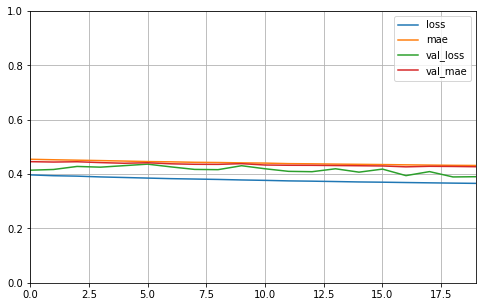

In [18]:
pd.DataFrame(model_his.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()